In [8]:
import numpy as np
from matplotlib.pyplot import *
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.optimize import leastsq
%matplotlib inline

# Primer resultado

In [9]:
datos1= np.genfromtxt('resultado1.txt')
v = datos1[:,0]
f = datos1[:,1]

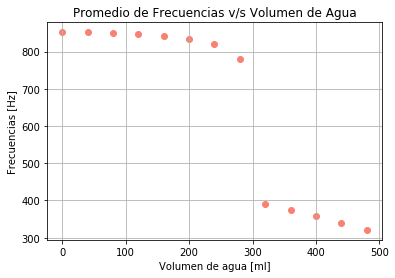

In [10]:
scatter(v,f, color="salmon")
grid()
xlabel("Volumen de agua [ml]")
ylabel("Frecuencias [Hz]")
title("Promedio de Frecuencias v/s Volumen de Agua")
savefig("datosmaloss.pdf")

# Segunda Resultado

In [11]:
datos = np.genfromtxt("DatosML.txt")
x = datos[:,0]
y = datos[:,1]
dy = datos[:,2]

In [12]:
def f(x, a, b,c,d):
    return  a*x**3+b*x**2+c*x+d

In [13]:
(a,b,c,d)= curve_fit(f,x,y,sigma=dy)[0]
print(a,b,c,d)

-8.098573487106382e-07 -0.00042757635419244473 0.04180633128879458 823.5944631863476


Datos con error

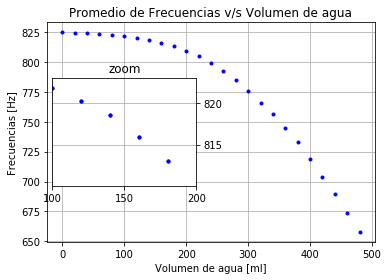

In [14]:
fig, ax = subplots(1, figsize=[5.5, 4])

ax.errorbar( x, y,xerr=dy ,ecolor="black",color='blue', marker=".", ls="none")
xlabel("Volumen de agua [ml]")
ylabel("Frecuencias [Hz]")
title("Promedio de Frecuencias v/s Volumen de agua")
grid()

fig.tight_layout()

inset_ax = inset_axes(ax, width=2, height=1.5, loc=6 )
inset_ax.errorbar( x, y,xerr=dy ,ecolor="black",color='blue', marker=".", ls="none")
# define el rango de los ejes
inset_ax.grid()
inset_ax.set_xlim(100, 200)
inset_ax.set_ylim(810, 823)
inset_ax.errorbar( x, y,xerr=dy ,ecolor="magenta",color='blue', marker=".", ls="none")
inset_ax.set_title('zoom')
# define la posición de los tick de los ejes
inset_ax.set_yticks([815, 820])
inset_ax.tick_params(left=False, right=True, labelleft=False, labelright=True)
inset_ax.set_xticks([100, 150, 200])
savefig("datossolitos.pdf")

# Ajustes

Primer ajuste

In [15]:
def h(x, a, b,c):
    return  a*x**2+b*x+c

In [16]:
(b2,b1,b0)= curve_fit(h,x,y,sigma=dy)[0]
print(b0,b1,b2)

820.0011925224973 0.15058703830826925 -0.00100958385127184


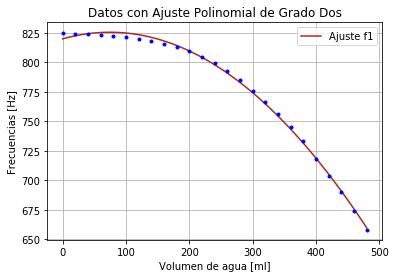

In [17]:
errorbar( x, y,xerr=dy ,ecolor="magenta",color='blue', marker=".", ls="none")
#plot(xx,a[0]*np.sin(a[1]*xx+a[2]))
xx=np.linspace(0,480,1000)
plot(xx,h(xx,b2,b1,b0),color='brown', label="Ajuste f1")
grid()
xlabel("Volumen de agua [ml]")
ylabel("Frecuencias [Hz]")
title("Datos con Ajuste Polinomial de Grado Dos")
legend()
savefig("datosajustegrad2.pdf")

Segundo ajuste con sus residuos

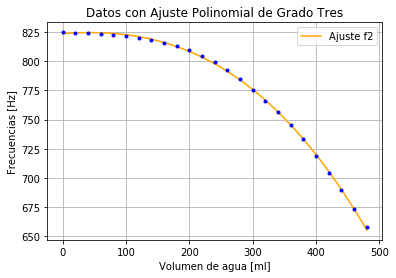

In [18]:
errorbar( x, y,xerr=dy ,ecolor="magenta",color='blue', marker=".", ls="none")
#plot(xx,a[0]*np.sin(a[1]*xx+a[2]))
xx=np.linspace(0,480,1000)
plot(xx,f(xx,a,b,c,d),color='orange', label="Ajuste f2")
grid()
xlabel("Volumen de agua [ml]")
ylabel("Frecuencias [Hz]")
title("Datos con Ajuste Polinomial de Grado Tres")
legend()
savefig("datosajustegrad3.pdf")

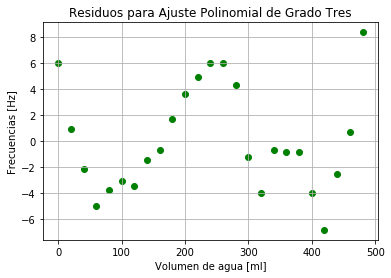

In [19]:
ep=(y-f(x,a,b,c,d))/dy 
scatter(x,ep,color='green')
grid()
xlabel("Volumen de agua [ml]")
ylabel("Frecuencias [Hz]")
title("Residuos para Ajuste Polinomial de Grado Tres")
savefig("residuos1.pdf")

In [20]:
def g(b,x,ep,dy):
    return (b[0]*np.sin(b[1]*x+b[2])+b[3]-ep*dy)/dy

In [21]:
b_in=[-7,0.02,0.,0.2]
k = leastsq(g,b_in,args=(x,ep,dy))[0]
print(k[0],k[1],k[2],k[3])

-1.3123928414822412 0.022014792863873856 -0.5049049668669856 0.1502092200448908


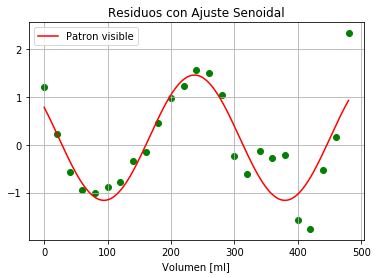

In [22]:
scatter(x,ep*dy,color="green")
z = np.linspace(min(x),max(x),10000)
plot(z,k[0]*np.sin(k[1]*z+k[2])+k[3], color='red', label='Patron visible')
grid(True)
legend(loc='upper left')
xlabel('Volumen [ml]')
title('Residuos con Ajuste Senoidal')
savefig('residuosajuste1.pdf')
show()

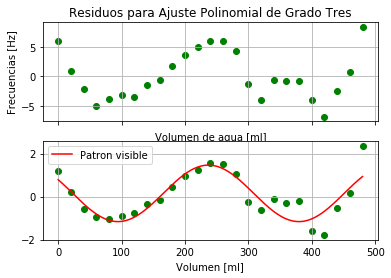

In [28]:
subplot(2,1,1)
ep=(y-f(x,a,b,c,d))/dy 
scatter(x,ep,color='green')
grid()

xticks([0,100,200,300,400,500],[])
xlabel("Volumen de agua [ml]")
ylabel("Frecuencias [Hz]")
title("Residuos para Ajuste Polinomial de Grado Tres")

subplot(2,1,2)
scatter(x,ep*dy,color="green")
z = np.linspace(min(x),max(x),10000)
plot(z,k[0]*np.sin(k[1]*z+k[2])+k[3], color='red', label='Patron visible')
grid(True)
legend(loc='upper left')
xlabel('Volumen [ml]')

savefig("residuoypatron.pdf")

Tercer ajuste con sus residuos

In [24]:
z = np.linspace(min(x),max(x),10000)

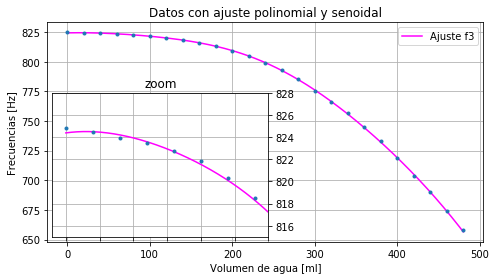

In [32]:
fig, ax = subplots(1, figsize=[7, 4])

ax.errorbar(x,y,xerr=dy,marker='.',ls='none',ecolor='black')
ax.plot(z,f(z,a,b,c,d)+k[0]*np.sin(k[1]*z+k[2])+k[3], color='magenta', label='Ajuste f3')
legend()
title('Datos con ajuste polinomial y senoidal')
xlabel("Volumen de agua [ml]")
ylabel("Frecuencias [Hz]")
grid()

fig.tight_layout()

inset_ax = inset_axes(ax, width=3, height=2, loc=3 )
inset_ax.plot(z,f(z,a,b,c,d)+k[0]*np.sin(k[1]*z+k[2])+k[3], color='magenta', label='Ajuste f3')
# define el rango de los ejes
inset_ax.grid()
inset_ax.set_xlim(-10, 150)
inset_ax.set_ylim(815, 828)
inset_ax.errorbar(x,y,xerr=dy,marker='.',ls='none',ecolor='black')
inset_ax.set_title('zoom')
# define la posición de los tick de los ejes

inset_ax.tick_params(left=False, right=True, labelleft=False, labelright=True)
#inset_ax.set_yticks([810, 815,820, 825])
#inset_ax.set_xticks()
inset_ax.set_xticklabels([])
#inset_ax.get_xticks()
savefig("tercerajuste.pdf")

In [27]:
vol= f(x,a,b,c,d)+k[0]*np.sin(k[1]*x+k[2])+k[3]

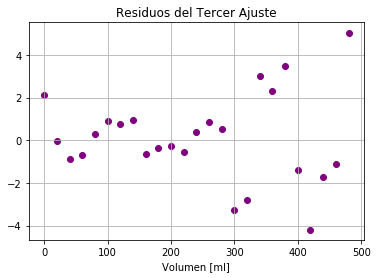

In [51]:
res = (y - vol)/dy 
scatter(x,res, color="purple")
title('Residuos del Tercer Ajuste')
xlabel('Volumen [ml]')
grid()
savefig("residuofinal800.pdf")

Comparación de ajuste 1 y 2

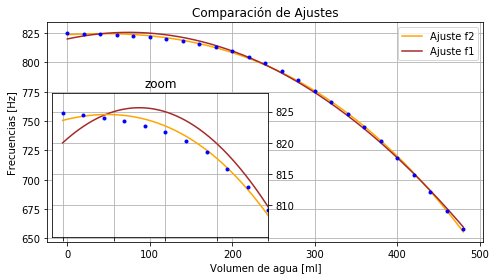

In [68]:
fig, ax = subplots(1, figsize=[7, 4])

ax.errorbar( x, y,xerr=dy ,ecolor="magenta",color='blue', marker=".", ls="none")
ax.plot(xx,f(xx,a,b,c,d),color='orange', label="Ajuste f2")
ax.plot(xx,h(xx,b2,b1,b0),color="brown", label="Ajuste f1")
legend()
title("Comparación de Ajustes")
xlabel("Volumen de agua [ml]")
ylabel("Frecuencias [Hz]")

grid()

fig.tight_layout()

inset_ax = inset_axes(ax, width=3, height=2, loc=3 )
inset_ax.plot(xx,h(xx,b2,b1,b0),color="brown", label="Ajuste f1")
inset_ax.plot(xx,f(xx,a,b,c,d),color='orange', label="Ajuste f2")
# define el rango de los ejes
inset_ax.grid()
inset_ax.set_xlim(-10, 200)
inset_ax.set_ylim(805, 828)
inset_ax.errorbar( x, y,xerr=dy ,ecolor="magenta",color='blue', marker=".", ls="none")
inset_ax.set_title('zoom')
# define la posición de los tick de los ejes
inset_ax.tick_params(left=False, right=True, labelleft=False, labelright=True)
inset_ax.set_yticks([810, 815,820, 825])
#inset_ax.set_xticks()
inset_ax.set_xticklabels([])
#inset_ax.get_xticks()
savefig("comparacion.pdf")

# Coeficiente de indeterminación

In [46]:
#Para ajuste polinomial
res1 = y-f(x,a,b,c,d)
st = np.sum((y - np.mean(y))**2)
sr1 = np.sum(res1**2)

res2 = y - vol
sr2 =  np.sum(res2**2)
r= (st - sr1)/st
r1= (st- sr1)/st
r2 = (st-sr2)/st

res3= y - h(x,b2,b1,b0)
sr3 = np.sum(res3**2)
r3= (st- sr3)/st

print("polinomio 3:", r1, "seno y polinomio:", r2, "polinomio 2:", r3)

polinomio 3: 0.9996136037449858 seno y polinomio: 0.9999016130524953 polinomio 2: 0.9983975258814894
